In [1]:
import pandas as pd
import numpy as np
import math 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv("customers.csv")

In [3]:
customer.head()

,ID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer["gender"] = np.where(customer['Gender']=="Female", 1, 0)
customer.drop(['ID', 'Gender'], axis = 1, inplace=True)
customer.head()

,Age,Income,Score,gender
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [5]:
def normalisation(input_data):
    data_normalised = preprocessing.scale(input_data) #Scaling the dataset
    data_normalised = pd.DataFrame(data=data_normalised,columns = list(input_data.columns))
    data_normalised['gender'] = input_data['gender']
    return data_normalised

customer_normalised= normalisation(customer)
customer_normalised.head()

,Age,Income,Score,gender
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


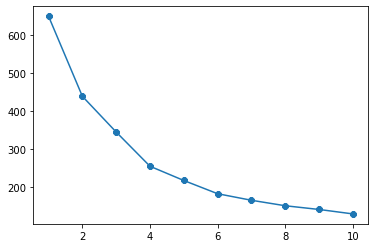

ModuleNotFoundError: No module named 'yellowbrick'

In [6]:
from sklearn.cluster import KMeans
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customer_normalised)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse, marker ="8")
plt.show()


from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(customer_normalised)      
visualizer.show()

Heuristics-Elbow chart:
From the elbow method, the optimal k is k=4

Cluster the samples using K-means with the best k. Plot the clusters and centroids (in 3D with denormalised axes). Can you find any meaningful results?Can you identify customer segments?

In [9]:
customer.label.unique()

array([3, 0, 1, 2])

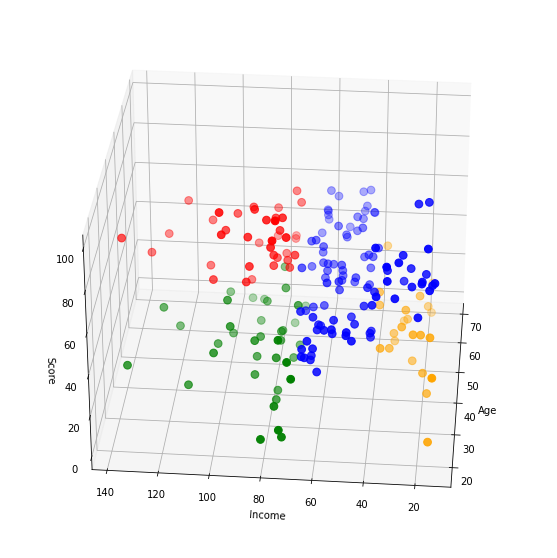

In [8]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(customer.iloc[:,1:])
customer["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.Age[customer.label == 0], customer["Income"][customer.label == 0], customer["Score"][customer.label == 0], c='blue', s=60)
ax.scatter(customer.Age[customer.label == 1], customer["Income"][customer.label == 1], customer["Score"][customer.label == 1], c='red', s=60)
ax.scatter(customer.Age[customer.label == 2], customer["Income"][customer.label == 2], customer["Score"][customer.label == 2], c='green', s=60)
ax.scatter(customer.Age[customer.label == 3], customer["Income"][customer.label == 3], customer["Score"][customer.label == 3], c='orange', s=60)
ax.scatter(customer.Age[customer.label == 4], customer["Income"][customer.label == 4], customer["Score"][customer.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Score')
plt.show()